In [1]:
library(ggplot2)
library(tidyverse)
library(ggsignif)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [9]:
# load data 

data <- read.csv("TissueMap data benchmark - Sheet1.csv")

# rename third column to mb
data <- data %>% rename(mb = `Data..MB.`)

# rename fourth column to time
data <- data %>% rename(time = `Time..sec.`)

data <- data %>%
  mutate(Tool = factor(Tool, levels = c("Raw", "Pre-processed", "Hybrid")))


	Welch Two Sample t-test

data:  immunoviewer_data and dzi_data
t = -9.8457, df = 9.0068, p-value = 4.049e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -103.70348  -64.95652
sample estimates:
mean of x mean of y 
     2.48     86.81 



	Welch Two Sample t-test

data:  immunoviewer_data and ome_tiff_data
t = -2.0339, df = 11.088, p-value = 0.0666
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.16436158  0.08436158
sample estimates:
mean of x mean of y 
     2.48      3.52 



	Welch Two Sample t-test

data:  dzi_data and ome_tiff_data
t = 9.7106, df = 9.0574, p-value = 4.359e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  63.9058 102.6742
sample estimates:
mean of x mean of y 
    86.81      3.52 


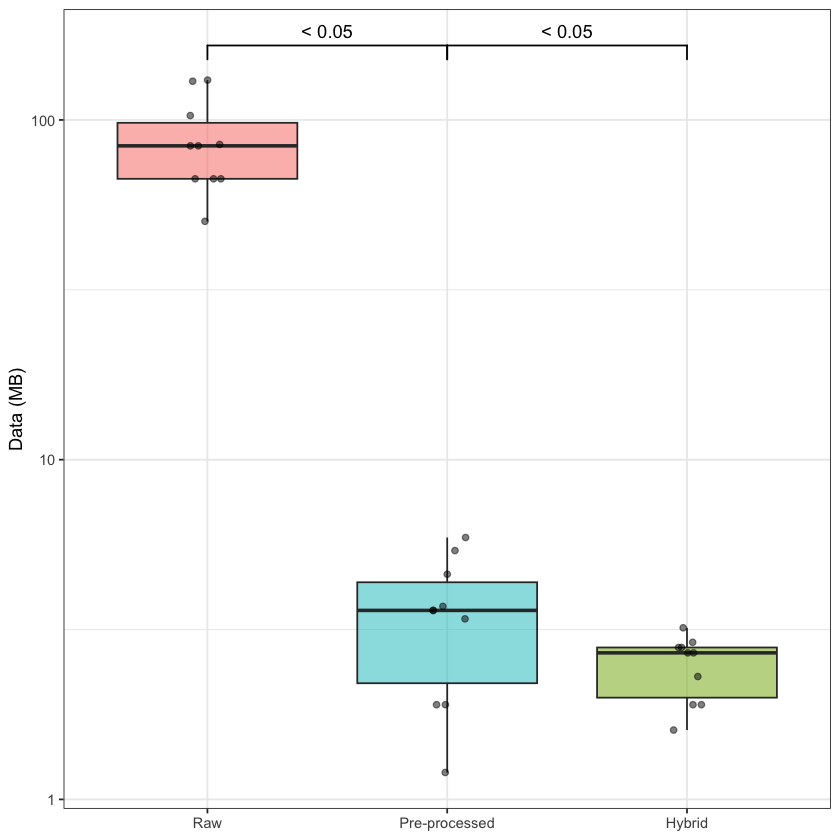

In [15]:
# statistical differences data

immunoviewer_data <- data %>% filter(Tool == "Hybrid") %>% pull(mb)
dzi_data <- data %>% filter(Tool == "Raw") %>% pull(mb)
ome_tiff_data <- data %>% filter(Tool == "Pre-processed") %>% pull(mb)

t_test_immunoviewer_dzi <- t.test(immunoviewer_data, dzi_data)
t_test_immunoviewer_ome_tiff <- t.test(immunoviewer_data, ome_tiff_data)
t_test_dzi_ome_tiff <- t.test(dzi_data, ome_tiff_data)

t_test_immunoviewer_dzi
t_test_immunoviewer_ome_tiff
t_test_dzi_ome_tiff

p_immunoviewer_dzi <- ifelse(t_test_immunoviewer_dzi$p.value < 0.05, "< 0.05", "NS")
p_dzi_ome_tiff <- ifelse(t_test_dzi_ome_tiff$p.value < 0.05, "< 0.05", "NS")

# boxplot of MBs on logscale for data usage

data %>% ggplot(aes(x = Tool, y = mb, fill=Tool)) + 
  geom_boxplot(alpha=0.5) + 
  geom_point(alpha=0.5, position = position_jitterdodge()) +
  scale_y_log10() +
  scale_fill_manual(values = c("Raw" = "#F8766D", "Pre-processed" = "#00BFC4", "Hybrid" = "#7CAE00")) +
  labs(title = NULL, y = "Data (MB)", x = NULL) + 
  theme_bw() +
  theme(legend.position = "none") +
  geom_signif(comparisons = list(c("Hybrid", "Pre-processed"), c("Pre-processed", "Raw")),
            annotations = c(p_immunoviewer_dzi, p_dzi_ome_tiff),
            tip_length = 0.02)

  ggsave("data-usage.png", width = 5, height = 5)


	Welch Two Sample t-test

data:  immunoviewer_data and dzi_data
t = -12.874, df = 9.0724, p-value = 3.912e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.051977 -2.842023
sample estimates:
mean of x mean of y 
    1.954     5.401 



	Welch Two Sample t-test

data:  immunoviewer_data and ome_tiff_data
t = 41.338, df = 9.8064, p-value = 2.483e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.677304 0.754696
sample estimates:
mean of x mean of y 
    1.954     1.238 



	Welch Two Sample t-test

data:  dzi_data and ome_tiff_data
t = 15.577, df = 9.0032, p-value = 8.09e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.55848 4.76752
sample estimates:
mean of x mean of y 
    5.401     1.238 


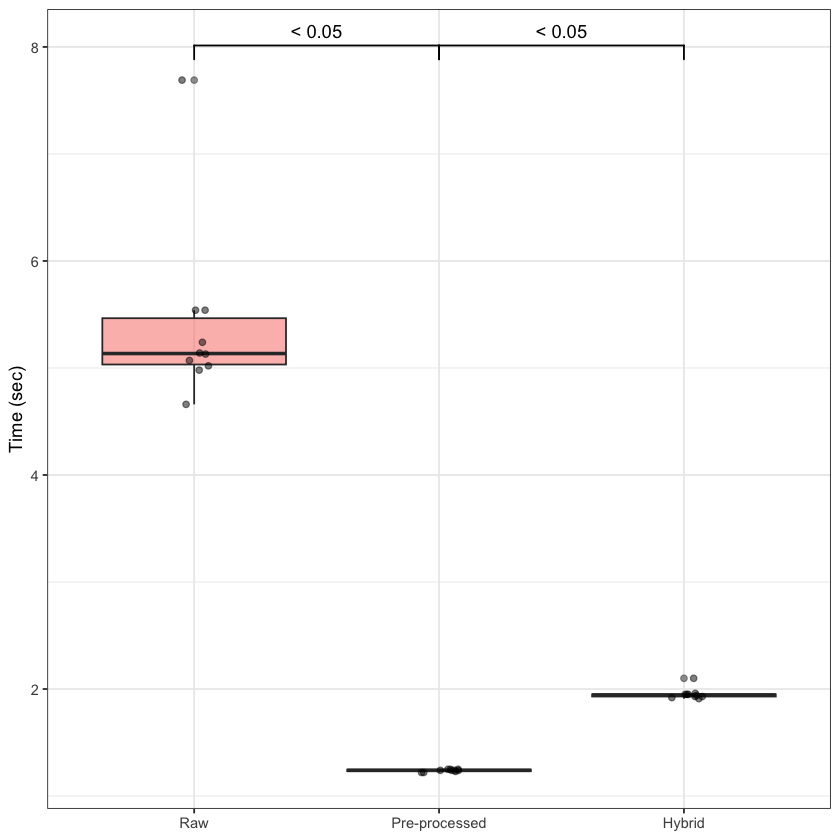

In [18]:
# statistical differences time

immunoviewer_data <- data %>% filter(Tool == "Hybrid") %>% pull(time)
dzi_data <- data %>% filter(Tool == "Raw") %>% pull(time)
ome_tiff_data <- data %>% filter(Tool == "Pre-processed") %>% pull(time)

t_test_immunoviewer_dzi <- t.test(immunoviewer_data, dzi_data)
t_test_immunoviewer_ome_tiff <- t.test(immunoviewer_data, ome_tiff_data)
t_test_dzi_ome_tiff <- t.test(dzi_data, ome_tiff_data)

t_test_immunoviewer_dzi
t_test_immunoviewer_ome_tiff
t_test_dzi_ome_tiff

p_immunoviewer_dzi <- ifelse(t_test_immunoviewer_dzi$p.value < 0.05, "< 0.05", "NS")
p_dzi_ome_tiff <- ifelse(t_test_dzi_ome_tiff$p.value < 0.05, "< 0.05", "NS")

# boxplot of MBs on logscale for data usage

data %>% ggplot(aes(x = Tool, y = time, fill=Tool)) + 
  geom_boxplot(alpha=0.5) + 
  geom_point(alpha=0.5, position = position_jitterdodge()) +
  scale_fill_manual(values = c("Raw" = "#F8766D", "Pre-processed" = "#00BFC4", "Hybrid" = "#7CAE00")) +
  labs(title = NULL, y = "Time (sec)", x = NULL) + 
  theme_bw() +
  theme(legend.position = "none") +
  geom_signif(comparisons = list(c("Hybrid", "Pre-processed"), c("Pre-processed", "Raw")),
          annotations = c(p_immunoviewer_dzi, p_dzi_ome_tiff),
          tip_length = 0.02)

  ggsave("time-taken.png", width = 5, height = 5)